# Piecewise linear regression

The botebook illustrates an implementation of a piecewise linear regression based on [scikit-learn](https://scikit-learn.org/stable/index.html). The buketization can be done with a [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) or a [KBinsDiscrztizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html). A linear model is then fitted on each bucket.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Piecewise data

Let's build a toy problem based on two linear models.

In [3]:
import numpy
import numpy.random as npr
X = npr.normal(size=(1000,4))
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = numpy.zeros(X.shape[0])
switch[t] = 1
y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1-t) + X[:, 2]

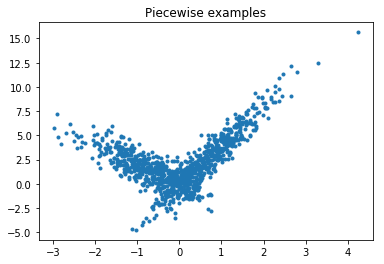

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], y, ".")
ax.set_title("Piecewise examples");

## Piecewise Linear Regression with a decision tree

The first example is done with a decision tree.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:, :1], y)

In [6]:
from mlinsights.mlmodel import PiecewiseLinearRegression
from sklearn.tree import DecisionTreeRegressor

model = PiecewiseLinearRegression(verbose=True,
                                  binner=DecisionTreeRegressor(min_samples_leaf=300))
model.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.84it/s]


PiecewiseLinearRegression(binner=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=300,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             verbose=True)

In [7]:
pred = model.predict(X_test)
pred[:5]

array([ 0.00896202, -0.28100952,  3.4999608 ,  0.0815007 ,  6.03278665])

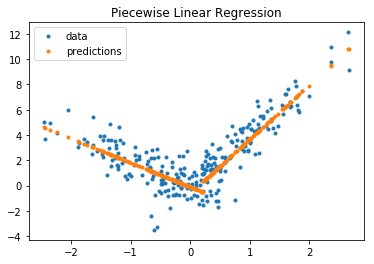

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], pred, ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n2 buckets")
ax.legend();

The method *transform_bins* returns the bucket of each variables, the final leave from the tree.

In [9]:
model.transform_bins(X_test)

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0.

Let's try with more buckets.

In [10]:
model = PiecewiseLinearRegression(verbose=True,
                                  binner=DecisionTreeRegressor(min_samples_leaf=150))
model.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 802.16it/s]


PiecewiseLinearRegression(binner=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=150,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             verbose=True)

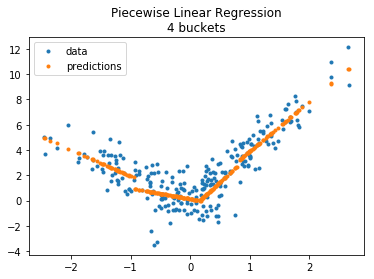

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n4 buckets")
ax.legend();

## Piecewise Linear Regression with a KBinsDiscretizer

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

model = PiecewiseLinearRegression(verbose=True,
                                  binner=KBinsDiscretizer(n_bins=2))
model.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.73it/s]


PiecewiseLinearRegression(binner=KBinsDiscretizer(encode='onehot', n_bins=2, strategy='quantile'),
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             verbose=True)

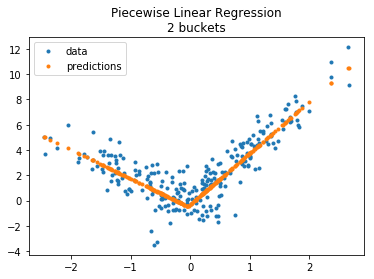

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n2 buckets")
ax.legend();

In [14]:
model = PiecewiseLinearRegression(verbose=True,
                                  binner=KBinsDiscretizer(n_bins=4))
model.fit(X_train, y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1001.33it/s]


PiecewiseLinearRegression(binner=KBinsDiscretizer(encode='onehot', n_bins=4, strategy='quantile'),
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             verbose=True)

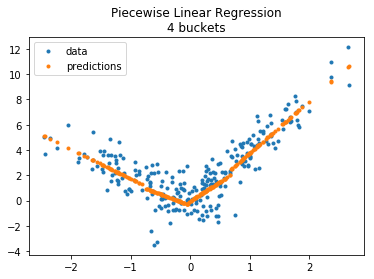

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n4 buckets")
ax.legend();

The model does not enforce continuity despite the fast it looks like so.

Let's compare with a constant on each bucket.

In [16]:
from sklearn.dummy import DummyRegressor
model = PiecewiseLinearRegression(verbose=True,
                                  binner=KBinsDiscretizer(n_bins=4),
                                  estimator=DummyRegressor())
model.fit(X_train, y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2013.83it/s]


PiecewiseLinearRegression(binner=KBinsDiscretizer(encode='onehot', n_bins=4, strategy='quantile'),
             estimator=DummyRegressor(constant=None, quantile=None, strategy='mean'),
             verbose=True)

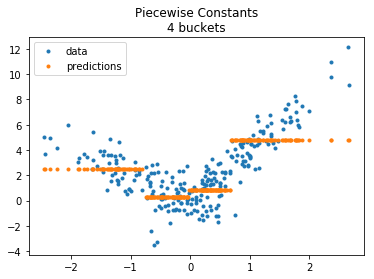

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Constants\n4 buckets")
ax.legend();